**CMSC 320 Final Project: When should you buy a car?**

---


**By**: Ankita Acharya, Alex Chao, Jitesh Nadimpalli

# Introduction

## Backstory

We've all gone through, or will go through, the process of buying a car. We'll spend countless hours researching car prices, reading car reviews, and listening to experts lecture us on when we should go buy a car so that we get the best price. We hate it, but we still do it anyway because we're inspired to do so by our friends who told us about that the one time they walked in to a car dealership on midsummer night on a full moon after 5 o'clock and walked out with a new sedan for only $10,500. While much of car buying does rely on luck, it is still a negotiation and there are tactics we can use to get the negotiation to go in our favor. The best tactic to use when negotiating on the price is to buy a car when not many cars are being sold. When a dealership is not selling as many cars, they will be more likely to reduce the price of the car so that you will buy it. The following articles support this theory and dive deeper into how to get a good deal on a car:


*   [Buying a Car - Auto Trader](https://www.autotrader.com/car-tips/buying-a-new-car-whens-the-best-time-211343)
*   [Buying a Car - US News](https://cars.usnews.com/cars-trucks/how-to-negotiate-the-best-price-on-a-new-car)
*   [Buying a Car - Review Journal](https://www.reviewjournal.com/business/20-secrets-to-getting-the-best-deal-on-a-new-car/)
*   [Buying a Car - Consumer Reports](https://www.consumerreports.org/car-pricing-negotiation/how-to-negotiate-a-new-car-price-effectively/)

Based on the articles we can conclude that the right or best time to buy a car will be when the least amount of cars are sold

## Our Project

Now that we have established why we should care about when to buy a car, let's figure when is the right time, specifically when are the least amount of cars sold. We realize that asking "When are the least amount of cars sold?" is a very general question because "when" could refer to a day, an hour, a time of the week, a month, or a season. For the purposes of this tutorial, we will only be focusing on which month the least amount of cars sold. We chose to only focus on month because:



1.   We could not find data showing the days of the week or hour of the day that a car was bought
2.   Car dealerships tend to have car sales on a monthly basis, like in the case of having holiday sales during the entire month of December or having back to school Sales during the entire month of August, so it was best to measure on that basis as well


This tutorial will show you how to collect car sales data from previous years, modify and format that data, graph it, analyze it, and come to a conclusion on when the least amount of cars are sold. We will be creating python scripts to scape the data from a website, rearrange that data into readable dataframes, plot those dataframes, and run linear regression analysis.

## Required Tools

This project will use the following python libraries:


*   [Requests](http://docs.python-requests.org/en/master/)
*   [Numpy](http://www.numpy.org/)
*   [Pandas](https://pandas.pydata.org/)
*   [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)
*   [MatPlotLib](https://matplotlib.org/)
*   [Math](https://docs.python.org/2/library/math.html)
*   [Seaborn](https://seaborn.pydata.org/)
*   [Sklearn](http://scikit-learn.org/stable/)

We do recommend that you refer to these libraries if there is any code that confuses you.


# Data Collection

The first step is to collect car sales data from GoodCarBadCar. 

SIDE NOTE: For this project we have chosen to obtain car sales data from [GoodCarBadCar.com](http://www.goodcarbadcar.net/about-gcbc/) because they do provide information on monthly car sales and are trusted by mainly reputable news sources like New York Times, Bloomberg, Forbes, Fox News, etc. 

The code below retrieves the tables displayed [here](http://www.goodcarbadcar.net/2012/10/usa-auto-industry-total-sales-figures/) on GoodCarBadCar. These tables contain information on how many cars were sold each month from 2010 to 2017 as well as the total number of cars sold each year from 1999 to 2017. 

We use the requests library to retrieve the html from the page. Then we use BeautifulSoup to parse the html for the tables. Once we have obtained the tables from the html, we convert those tables into a dataframe using the Pandas library. You will notice that the table showing the individual monthly sales is split up into two separate tables (one for 2010 to 2014 and one for 2015 to 2017). The last step will be to merge those two tables (using the pandas merge function) into a single table containing all monthly sales data for every year this decade.

In [3]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import seaborn as sns

def getTables(url):
  r = requests.get(url)
  sales_figs = r.content
  bsify_sales_figs = BeautifulSoup(sales_figs, 'html.parser')
  tables = bsify_sales_figs.findAll("table")
  return tables

#Get total sales in the US Market by year and month from this url.
tables = getTables('http://www.goodcarbadcar.net/2012/10/usa-auto-industry-total-sales-figures/')

table_one = tables[0]
table_two = tables[1]
table_three = tables[2]

#This dataframe is for total sales of cars in US by year, no breakdown by month.
totals_df = pd.read_html(str(table_three), flavor='bs4')[0]

#These two tables contain info about car sales by month and year.
df_one = pd.read_html(str(table_one), flavor='bs4')[0]
df_two = pd.read_html(str(table_two), flavor='bs4')[0]


df_one.columns = df_one.iloc[0]
df_two.columns = df_two.iloc[0]

df_one = df_one.drop(df_one.index[0])
df_two = df_two.drop(df_two.index[0])

#Combine them into one table
months_df = pd.merge(df_one, df_two, how='outer', on='Month')
months_df.drop(months_df.columns[[9, 10]], axis=1, inplace=True)

months_df

,Month,U.S. Total Market Sales 2010,U.S. Total Market Sales 2011,U.S. Total Market Sales 2012,U.S. Total Market Sales 2013,U.S. Total Market Sales 2014,U.S. Total Market Sales 2015,U.S. Total Market Sales 2016,U.S. Total Market Sales 2017
0,January,698986,819886,913317,1043192,1011187,1152480,1148087,1142181
1,February,780422,993566,1149547,1192299,1192467,1258570,1343922,1333128
2,March,1066298,1246662,1404699,1453038,1537270,1545710,1595065,1554998
3,April,982263,1157923,1184567,1285446,1391303,1455242,1506431,1426883
4,May,1103043,1061835,1334642,1443311,1609678,1634952,1535670,1527052
5,June,983781,1053263,1285499,1403121,1421963,1476472,1512996,1470311
6,July,1050140,1059726,1153759,1313844,1435543,1510941,1521871,1411181
7,August,997522,1072387,1285292,1501294,1586374,1577971,1511405,1476307
8,September,959008,1053770,1188899,1137206,1245786,1442112,1434483,1519325
9,October,950250,1021185,1092294,1206182,1281132,1455153,1370721,1353424


# Data Formatting

We've successfully scrapped and collected the data but it is still not in a format that we can use for further analysis. A few problems become apparent as we take a close look at the data, specifically these problems:


*   The monthly sales data for each year only contains data for each year while the annual sales data contains data for every year from 1999 to 2017 (inclusive). These two tables should show the same time period so that we can streamline the data and remove unnecessary cluster. To do so we must remove the extraneous years (1999 to 2009) from the annual sales table. We will also remove the sales data for 2017 because as of the time of this tutorial, the 2017 year has not concluded yet.
*   If you look closely, you will notice that the columns for the annual sales table does not contain column names, they are just delegated as being column 0 and column 1. Instead the column headers are stored as the first row of the table. We need to delete that row and rename those columns to have appropriate names.
*   The monthly sales table does not follow the correct format for displaying each row and column. Each column should be a variable that you are testing for in the experiment and each row should be trial/run of the experiment. Each cell should contain the results of the trial for that given variable. In our scenario we observing the resulting sales for each during a year, so our table should display each month as a column and each row as a year. We will need to flip the rows and columns on our table.
*   We are also missing total sales during a month for the years 2010 to 2016. Since this data is not automatically available through GoodCarBadCar we will need to gather this data on our own. We will use the monthly sales table to total all the sales in each column (which will represent a month after we finish changing it as previously stated). We will then store each of the totals in their own table.



The first thing we shall do is remove the extraneous years from the annual sales table and rename column headers. The following code below does exactly that.

In [4]:
# create new dataframe to store only car sales for this decade (minus 2017 since it has not concluded)
totals_df_2010_2016 = pd.DataFrame(np.random.randint(low=0, high=10, size=(7, 2)), columns=['Year', 'Cars Sold'])

# create new lists to store values for this decade
years = []
sales = []

# populate lists using values from totals dataframe
for index, row in totals_df.iterrows():
  str_1 = filter(lambda x: x.isdigit(), row[0])
  
  if(str_1 != '' and int(str_1) > 2009 and int(str_1) < 2017):
    year = int(str_1)
    sale = row[1]
    
    years.append(year)
    sales.append(sale)

# populate dataframe created above with values from list
for index, row in totals_df_2010_2016.iterrows():
  if(row['Year'] != '2017'):
    row['Year'] = years[index]
    row['Cars Sold'] = sales[index]
  
totals_df_2010_2016

,Year,Cars Sold
0,2010,11589844
1,2011,12778885
2,2012,14492398
3,2013,15582136
4,2014,16531070
5,2015,17470659
6,2016,17539052


The next issue we will tackle is changing the monthly sales table to display each year as a row, each month as a column, and each cell as a sale made in that month for that year.

In [5]:
# flip the dataframe to show increase or decrease in car sales each month by year
# Change Months column to year
months_df_copy = months_df.copy(deep=True)
months_df_copy.rename(columns={'Month':'Year'}, inplace=True)

# Get list of months
months_columns = months_df_copy['Year']

# Get list of years
years_columns = months_df.columns.values.tolist()
years_columns.pop(0)

# Create empty dataframe to store values
temp_df = pd.DataFrame(np.random.randint(low=0, high=10, size=(8, 12)), columns=months_columns)

# store each year's values as a row
df_row = []

for year in years_columns:
  # store each month's value as a entry in the row of years
  df_year = []
  
  for index,row in months_df.iterrows():
    df_year.append(row[year])
    
  df_row.append(df_year)
  
# populate dataframe with 2d array that was created
months_df_flipped = pd.DataFrame(data=df_row, index=temp_df.index, columns=temp_df.columns)

# add column to denote year
year_column = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
months_df_flipped['Year'] = year_column

# Change values to numeric values
for month in months_columns:
  months_df_flipped[month] = pd.to_numeric(months_df_flipped[month], errors='ignore')

# rearrange columns and bring year column to front
cols = months_df_flipped.columns.tolist()
cols = cols[-1:] + cols[:-1]
months_df_flipped = months_df_flipped[cols] 

months_df_flipped

Year,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2010,698986,780422,1066298,982263,1103043,983781,1050140,997522,959008,950250,873367,1144806.0
1,2011,819886,993566,1246662,1157923,1061835,1053263,1059726,1072387,1053770,1021185,994786,1243784.0
2,2012,913317,1149547,1404699,1184567,1334642,1285499,1153759,1285292,1188899,1092294,1143916,1356070.0
3,2013,1043192,1192299,1453038,1285446,1443311,1403121,1313844,1501294,1137206,1206182,1243852,1358734.0
4,2014,1011187,1192467,1537270,1391303,1609678,1421963,1435543,1586374,1245786,1281132,1302685,1507928.0
5,2015,1152480,1258570,1545710,1455242,1634952,1476472,1510941,1577971,1442112,1455153,1318210,1641913.0
6,2016,1148087,1343922,1595065,1506431,1535670,1512996,1521871,1511405,1434483,1370721,1378635,1688368.0
7,2017,1142181,1333128,1554998,1426883,1527052,1470311,1411181,1476307,1519325,1353424,1366071,NaN


Lastly, we need to create a table to contain the total cars sold from 2010 to 2016 during a specific month. To do that we will get the sums for each column in the monthly sales table and store those sums in their own table

In [54]:
# create dictionary containing total cars sold each month from 2010 to 2016
totals_per_month = {}

for month in months_columns:
  total = 0
  for index, row in months_df_flipped.iterrows():
    if (row['Year'] < 2017):
      total += row[month]
  
  totals_per_month[month] = total

#convert dictionary into dataframe
totals_months_df = pd.DataFrame(totals_per_month.items(), columns=['Month', 'Total_Cars_Sold'])

totals_months_df

,Month,Total_Cars_Sold
0,February,7910793.0
1,October,8376917.0
2,March,9848742.0
3,August,9532245.0
4,May,9723131.0
5,January,6787135.0
6,June,9137095.0
7,September,8461264.0
8,April,8963175.0
9,December,9941603.0


# Data Visualization and Observation

Now that our data is correctly formatted we can plot our data to help reveal some trends about car sales in this decade

## Total Car Sales for each Year

This graph is meant to give us insights into any yearly car sales trends for this decade that have become apparent

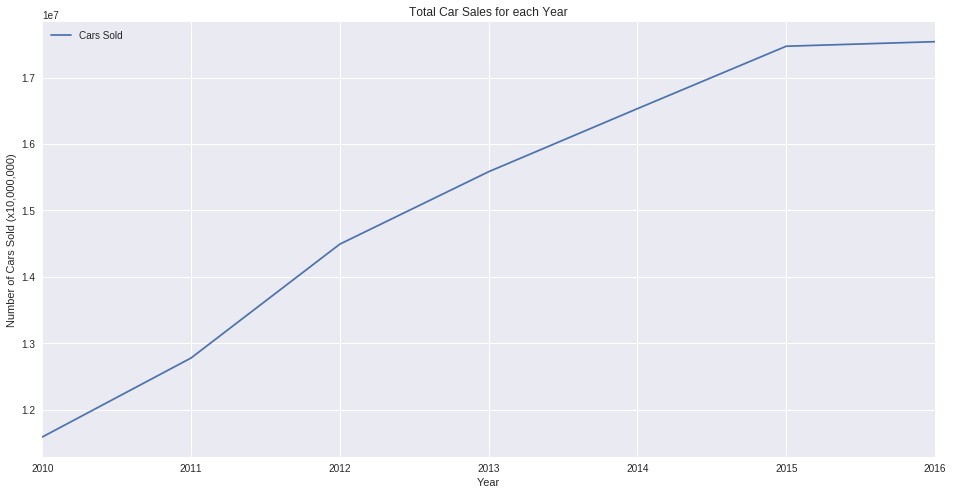

NOTE: 2017 Data only includes cars sold in the past 11 months. December data not yet available so 2017 data is not graphed


In [26]:
totals_df_2010_2016.plot(kind = 'line', x = 'Year', y = 'Cars Sold', title='Total Car Sales for each Year', figsize=(16,8))
plt.ylabel('Number of Cars Sold (x10,000,000)')
plt.show()

print("NOTE: 2017 Data only includes cars sold in the past 11 months. December data not yet available so 2017 data is not graphed")

## Observations

Based on the graph we can observe that:

* Car sales have been increasing each year
* Every year, except for 2016, there was an increase of around 1,000,000 cars. 
* 2016 is the only year this decade where the amount of cars sold stayed at around the same amount as the year before. There was still an increase as shown by the slight incline between 2015 and 2016, but nowhere near as much as the years before and definately not noticable at first glance. 
* 2012 seems to have been the best year for car sales as shown by the almost 2,000,000 increase (nearly double the increase of other years) from the previous year. 

## Total Cars Sold during each Month 2010-2016

This graph is meant to give us insights into how many cars were sold each month during the entire decade. This can help us determine which months were the best selling and worst selling months overall for this decade. 

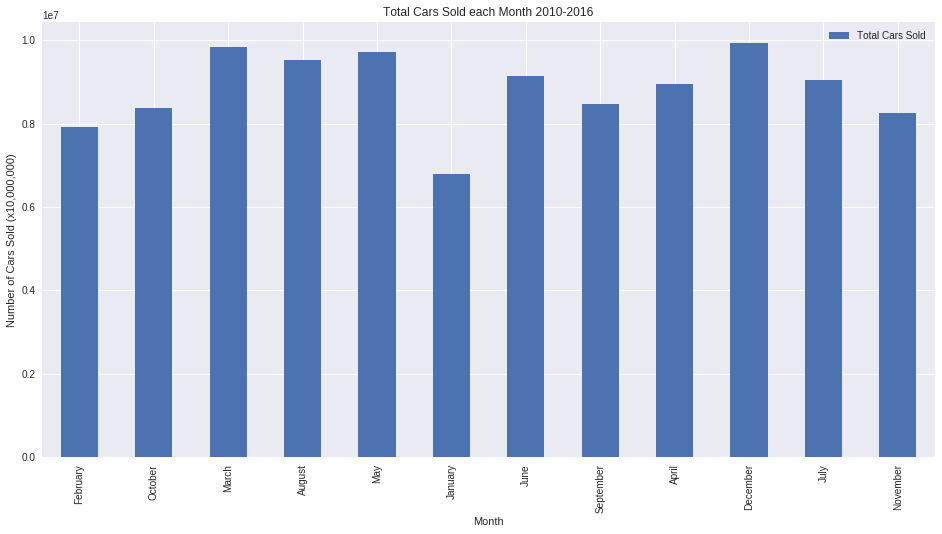

NOTE: 2017 Data only includes cars sold in the past 11 months. December data not yet available so 2017 data is not graphed


In [117]:
totals_months_df.plot(kind = 'bar', x='Month', y='Total Cars Sold', figsize=(16,8))
plt.title('Total Cars Sold each Month 2010-2016')
plt.ylabel('Number of Cars Sold (x10,000,000)')
plt.show()

print("NOTE: 2017 Data only includes cars sold in the past 11 months. December data not yet available so 2017 data is not graphed")

## Observations

Based on the graph above we can say that:

*   the least amount of cars are sold during January
*   the first two months of the year had the lowest total sales this decade
*   the most amount of cars are sold this decade during December with a total of almost 10,000,000 over 7 years
*   while the most cars are sold in December, almost as many cars are sold during the months of March, August, and May. They are all within 500,000 cars of December
*   there is a noticable gap between the month with the second least amount of cars sold this decade (February) and the first (January). Around 1.5 million more cars were sold in total during February than January



For the following graph, there will be 12 lines, so to make sure that each line has a unique color, we created an array of colors to cycle through for plotting

In [0]:
# create a list of 12 unique colors to represent each month of the year
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'indigo', 'black', 'cyan', 'limegreen', 'gray']

## Cars Sold Each Month From 2010 to 2017 

This graph shows us the yearly trends for each month during this decade. It can give us insights into which months were the best selling and worst selling months each year (not just in total like the previous graph) for this decade.

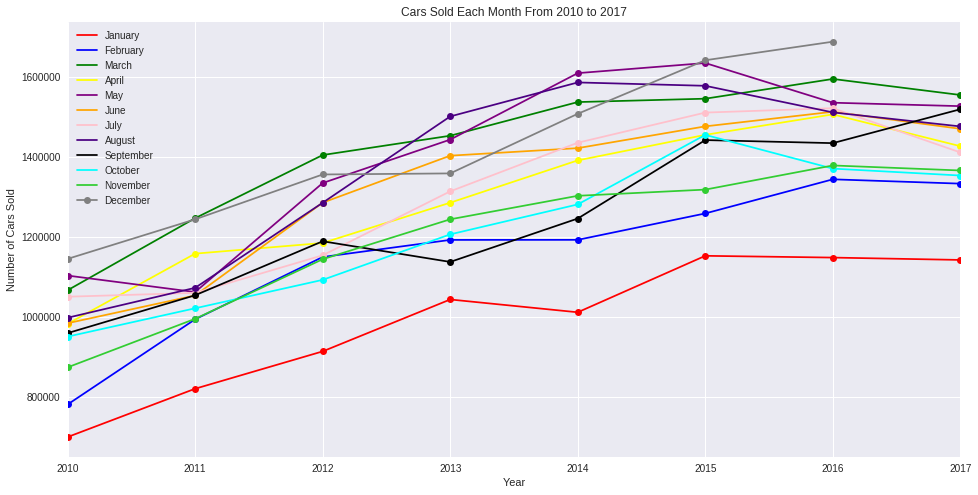

NOTE: 2017 Data only includes cars sold in the past 11 months. December data not yet available


In [118]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel("Number of Cars Sold")
plt.title("Cars Sold Each Month From 2010 to 2017")

count = 0

# for each month in the year plot a line to show sales for that line. For the colors
# cycle through the list of colors created earlier
for month in months_columns:
  months_df_flipped.plot(kind = 'line', x='Year', y=month, ax = ax, color = colors[count], figsize=(16,8), marker='o')
  count += 1
  
plt.show()

print("NOTE: 2017 Data only includes cars sold in the past 11 months. December data not yet available. 2017 data is still graphed because December 2017 will not directly affect the trends for other months")

## Observations

Based on the graph above, we can observe that:

*   January consistantly had the lowest sales each year during this decade.
*   There is a noticable gap between January and the next lowest selling month for that year. The gap is so noticable and large that the line for January never touches the line for any other month. The closest January ever came was at the very beginning of the decade, in 2010, when it was within ~10,000 cars of February
*   No month was ever consistantly the best selling month of the year for the entire decade
*   No month was ever consistantly the second worst selling month of the year for the entire decade. The closest month to achieve that was February. From 2014 to 2016 (possibly 2017, we won't know until December concludes) it was the second worst selling month. Even then the biggest gap between it and the next worst selling month was never larger than ~6,000 cars (nearly half of January's smallest gap). This happened in 2014 when February sold ~6,000 cars less than November


# Linear Regression Analysis

We decided to use sklearn's LinearRegression and cross value prediction and score modules to aid us in our analysis of our data. We decided to use r^2 score for the 7-fold cross validation to see how well a linear model would be able to generalize for our data. r^2 scores are easy to interpret with a 1 indicating a perfect fit and a 0 meaning no fit.

In [55]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Average number of cars sold per month, then do k fold cross validation test. 

def get_pred(x, y, regr):
  pred = cross_val_predict(regr, x, y, cv=7)
  return pred

def get_r2(x, y, regr):
  r2 = cross_val_score(regr, x, y, scoring='r2',cv=7)
  return r2

x = months_df_flipped[['Year']][:-1]
y = totals_df_2010_2016['Cars Sold']

#Visualize what model predicted as total sold per year.
predicted = get_pred(x, y, linear_model.LinearRegression())

#Want to test how well model can generalize.
r2_score = get_r2(x, y, linear_model.LinearRegression())

print("R^2 scores for the all sales per year")
print(r2_score)
print("All brands predicted values for sales per year")
print(predicted)


R^2 scores for the all sales per year
[ 0.  0.  0.  0.  0.  0.  0.]
All brands predicted values for sales per year
[ 12363911.4666667   13158270.4000001   14008884.43478251
  15066984.66666675  16110898.69565225  17135529.5999999   18915868.79999971]


Notice, that the R^2 values for sales per year is zero for each year between 2010 to 2016. Because the R^2 values are an indicator of how well the data fits the linear model, we can determine that linear regression is a very bad model to fit this data. R^2 values should ideally be closer to one in order to claim the model shares significance with the data.

In [56]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

#adding numerical value to month
totals_months_df.reset_index(inplace = True)

f = smf.ols(formula='index ~ Total_Cars_Sold', data=totals_months_df).fit()
print(f.summary())

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                   0.07145
Date:                Sat, 16 Dec 2017   Prob (F-statistic):              0.795
Time:                        01:59:27   Log-Likelihood:                -31.852
No. Observations:                  12   AIC:                             67.70
Df Residuals:                      10   BIC:                             68.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6004     10.902     

Here, we look into the months and cars sold data. Again, the R^2 is very small and therefore we can not say there is a good fit for the linear model on our data. When we plot the predicted versus measured data below we can see that the linear model in some cases over predicts the values and in other cases under predicts, not really providing an acccurate prediction for any of the data points.

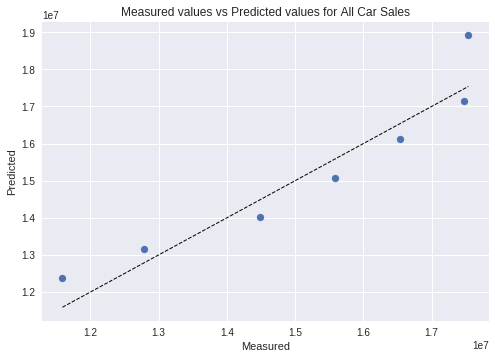

In [42]:
#Plot the predicted values vs the measured values
fig, ax = plt.subplots()
ax.scatter(y, predicted)

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Measured values vs Predicted values for All Car Sales')

plt.show()

This graph shows the plot for predicted versus measured values for the car sales per year table. Again, because the linear model was not the best fit for our data, it unfortunately can not tell us a lot, espescially with so few data points (one per year). 

# Conclusion

For many ordinary people buying a new car is an important decision and therefore finding the most optimal time of the year could be useful information. Based on the following, however, we could not fit our data to a linear model. While we could not accurately predict a time of year for when best to buy a car based on the linear regression model, we can say that based on the observations made from the graphs, that January has always been the month when the least amount of cars were sold during this decade. We cannot predict that January will continue to the be the month with the worst car sales using linear regression, but we can conclude that in the previous years of this decade, the best time to buy a car was always in January due to the low sales. We can also see that numbers of cars sold seems to be increasing per year and that of all seven years of data, most cars are sold in total during December. Further analysis could include brand information, prices, and type of sales promotions (Memorial Day Sales, Christmas Sales, New Years Sales, etc.) information to gain more context behind monthly car sales.

# Further Resources

[Car Sales Base Data](http://carsalesbase.com/us-car-sales-data/)
[](https://www.bea.gov/national/xls/gap_hist.xlsx)

[Bureau of Economic Analysis Global Car Data](https://www.bea.gov/national/xls/gap_hist.xlsx)